**Outlier detection and removal using percentile**

In [2]:

import pandas as pd
import io
from google.colab import files
  
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['heights.csv']))
print(df)

Saving heights.csv to heights.csv
       name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
9     imran    14.5
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5


In [6]:
max=df['height'].quantile(0.95)
min=df['height'].quantile(0.05)

print("\n valid data found\n")
print(df[ (df['height'] < max) & (df['height'] > min)])


print("\n\n outliers data found\n")
print(df[ (df['height'] > max) | (df['height'] < min)])


 valid data found

       name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5


 outliers data found

      name  height
9    imran    14.5
12  yoseph     1.2


**Outlier detection and removal: z score, standard deviation**

In [7]:

import pandas as pd
import io
from google.colab import files
  
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['z_std_heights.csv']))
print(df)



Saving z_std_heights.csv to z_std_heights.csv
      gender     height
0       Male  73.847017
1       Male  68.781904
2       Male  74.110105
3       Male  71.730978
4       Male  69.881796
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[10000 rows x 2 columns]


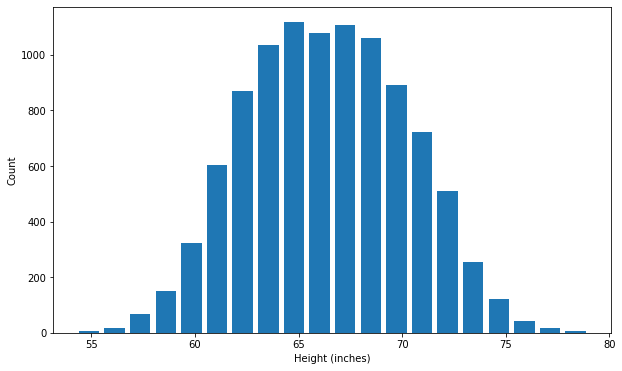

In [10]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize']=(10,6)
plt.hist(df['height'], bins=20,rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

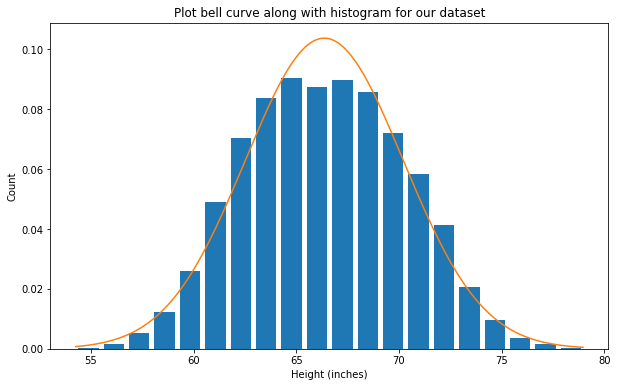

In [11]:

from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.title('Plot bell curve along with histogram for our dataset')
rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [13]:
print("mean is : ",df['height'].mean())
print("std is  : ",df['height'].std())

mean is :  66.3675597548656
std is  :  3.847528120795573


Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. 

In [27]:
upper_limit= df['height'].mean() + 3*df['height'].std()
lower_limit= df['height'].mean() - 3*df['height'].std()

print("\nHere are the outliers that are beyond 3 std dev from mean")
print(df[(df['height'] > upper_limit) | (df['height'] < lower_limit)])


#Above the heights on higher end is 78 inch which is around 6 ft 6 inch. 
#Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points.
#Similarly on lower end it is 54 inch which is around 4 ft 6 inch. 
#While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers


print("\n\nbelow are  heights within upper and lower limit \n")
df[(df['height'] < upper_limit) & (df['height'] > lower_limit)]


Here are the outliers that are beyond 3 std dev from mean
      gender     height   z-score
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027


below are  heights within upper and lower limit 



,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


(2) Outlier detection and removal using Z Score



Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [28]:
#calculating z scores for all
df['z-score']=(df['height'] - df['height'].mean()) / df['height'].std()

print("\n\nGet data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away")

print(df.loc[ ( df['z-score'] < -3 ) | ( df['z-score'] > 3 ) ]) 


print("\n\nRemove the outliers and produce new dataframe\n")
df.loc[(df['z-score'] >-3) & (df['z-score'] < 3) ]



Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away
      gender     height   z-score
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027


Remove the outliers and produce new dataframe



,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
